<a href="https://colab.research.google.com/github/Uwimbabazi-Keza/Breast-Cancer-Prediction-Model/blob/main/MPL_Breast_Cancer_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import pickle
import os

Epoch 1/100
7/7 [==============================] - 1s 52ms/step - loss: 1.7565 - accuracy: 0.3732 - val_loss: 1.7295 - val_accuracy: 0.3706
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 1.7120 - accuracy: 0.3873 - val_loss: 1.6851 - val_accuracy: 0.3986
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 1.6693 - accuracy: 0.4460 - val_loss: 1.6429 - val_accuracy: 0.5035
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 1.6282 - accuracy: 0.5728 - val_loss: 1.6020 - val_accuracy: 0.6783
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5884 - accuracy: 0.7324 - val_loss: 1.5620 - val_accuracy: 0.8531
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5489 - accuracy: 0.8592 - val_loss: 1.5224 - val_accuracy: 0.8881
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 1.5100 - accuracy: 0.8991 - val_loss: 1.4835 - val_accuracy: 0.9091
Epoch 8/100
7/7 [===

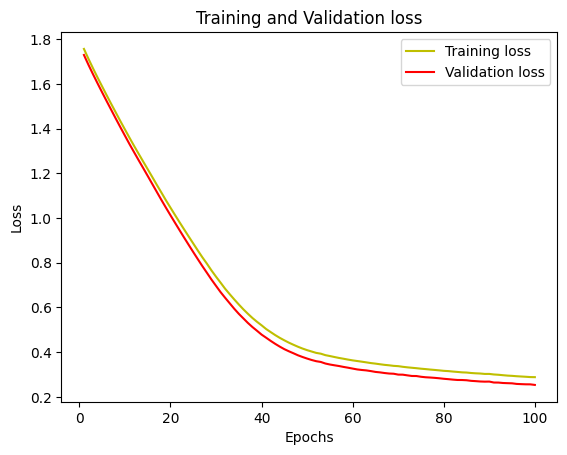

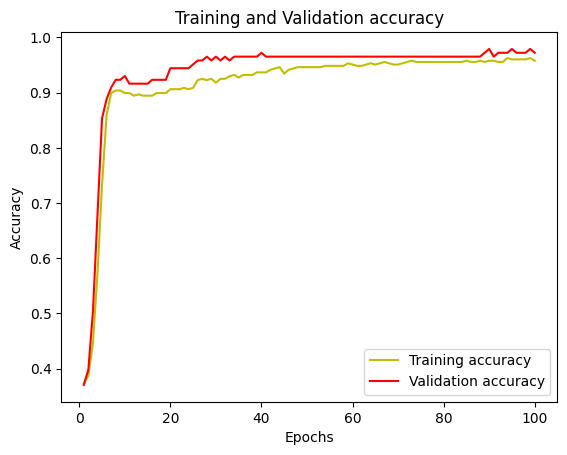

In [3]:
def preprocess_data(data):
    df = pd.read_csv(data)
    df = df.dropna(axis=1)

    lb = LabelEncoder()
    df['diagnosis'] = lb.fit_transform(df['diagnosis'])

    x = df.drop(labels=["diagnosis", "id"], axis=1)
    y = df["diagnosis"].values

    # scale
    s = MinMaxScaler()
    s.fit(x)
    x = s.transform(x)

    # split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    return x_train, x_test, y_train, y_test

def train_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(16, input_dim=30, activation='relu', kernel_regularizer=l1(0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    history = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

    # Save model as .pkl format
    try:
        if not os.path.exists('models'):
            os.makedirs('models')

        with open('models/breast_cancer_model.pkl', 'wb') as f:
            pickle.dump(model, f)

        print("Model saved successfully as a .pkl file.")

    except Exception as e:
        print(f"An error occurred while saving the model: {e}")

    return model, history

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5)

    # Confusion Matrix
    c = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(c)

    # Specificity
    specificity = c[0, 0] / (c[0, 0] + c[0, 1])
    print("Specificity (True Negative Rate):", specificity)

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
    print("Classification Report:")
    print(report)

    return c, specificity, f1, report

if __name__ == "__main__":
    x_train, x_test, y_train, y_test = preprocess_data('data.csv')

    model, history = train_model(x_train, y_train, x_test, y_test)

    evaluate_model(model, x_test, y_test)

    # Plot loss curves
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'y', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()